In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tarfile as tarf
import os
from PIL import Image
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D

In [ ]:
!wget -q https://www.dropbox.com/s/lrplwf8dturn43p/CNN_dataset.tar.xz

In [ ]:
dataSet = tarf.open("CNN_dataset.tar.xz")
dataSet.extractall()
dataSet.close()

In [ ]:
dataFolder = './CNN_dataset/'
classNames = sorted([x for x in os.listdir(dataFolder) if os.path.isdir(os.path.join(dataFolder, x))])
classCount = len(classNames)
imageFiles = [[os.path.join(dataFolder, className, x) 
                for x in os.listdir(os.path.join(dataFolder, className))] 
               for className in classNames]
imageFileList = []
imageLabelList = []
for i, className in enumerate(classNames):
    imageFileList.extend(imageFiles[i])
    imageLabelList.extend([i] * len(imageFiles[i]))
totalNum = len(imageFileList)

print('Total Images:', totalNum)
print("Label Names:", classNames)
print("Label Counts:", [len(imageFiles[i]) for i in range(classCount)])

Total Images: 50000
Label Names: ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label Counts: [10000, 10000, 10000, 10000, 10000]


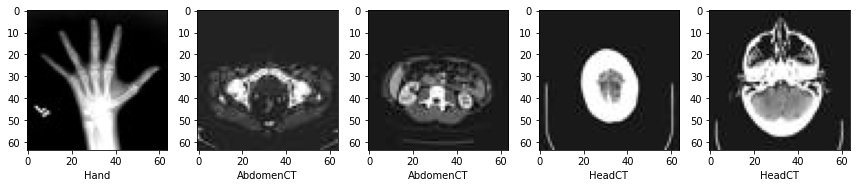

In [ ]:
plt.subplots(1, 5, figsize=(12, 12))


for i,k in enumerate(np.random.randint(totalNum, size=5)):
    img = Image.open(imageFileList[k])
    arr = np.array(img)
    plt.subplot(1, 5, i + 1)
    plt.xlabel(classNames[imageLabelList[k]])
    plt.imshow(arr, cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:


testFracData = 0.15
trainX, trainY = [], []
testX, testY = [], []

for i in range(totalNum):
    ran = np.random.random()
    if ran < testFracData:
        testX.append(cv2.imread(imageFileList[i]))
        testY.append(imageLabelList[i])
    else:
        trainX.append(cv2.imread(imageFileList[i]))
        trainY.append(imageLabelList[i])

print(" For Training data =",len(trainX), "\n For Testing data =",len(testX))

 For Training data = 42674 
 For Testing data = 7326


In [ ]:
print(imageFileList[30000])
print(imageLabelList[30000])
classNames

./CNN_dataset/Hand/000377.jpeg
3


['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX  = np.array(testX)
testY  = np.array(testY)
print(type(trainX))

trainY = to_categorical(trainY, classCount)
testY = to_categorical(testY, classCount)
testY

<class 'numpy.ndarray'>


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255
print("trainX shape:", trainX.shape, "train shape:", trainY.shape)

trainX shape: (42674, 64, 64, 3) train shape: (42674, 5)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2097216   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
modelLog=model.fit(trainX, trainY,
          batch_size=60,
          epochs=5,
          verbose=1,
          validation_split=.15)

Epoch 1/5
605/605 [==============================] - 113s 184ms/step - loss: 0.2064 - accuracy: 0.9235 - val_loss: 2.2616e-04 - val_accuracy: 1.0000
Epoch 2/5
605/605 [==============================] - 106s 175ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0018 - val_accuracy: 0.9998
Epoch 3/5
605/605 [==============================] - 109s 180ms/step - loss: 0.0305 - accuracy: 0.9896 - val_loss: 6.4156e-05 - val_accuracy: 1.0000
Epoch 4/5
605/605 [==============================] - 107s 176ms/step - loss: 0.0272 - accuracy: 0.9902 - val_loss: 2.2757e-05 - val_accuracy: 1.0000
Epoch 5/5
605/605 [==============================] - 107s 177ms/step - loss: 0.0233 - accuracy: 0.9917 - val_loss: 1.0014e-04 - val_accuracy: 1.0000


In [ ]:
testPredict = model.predict(testX)
testPredictLabels = np.argmax(testPredict, axis=1)
testTrueLabels = np.argmax(testY, axis=1)


confusionMatrix = confusion_matrix(testTrueLabels, testPredictLabels)

print(confusionMatrix)

229/229 [==============================] - 7s 29ms/step
[[1522    0    0    0    0]
 [   0 1439    1    6    0]
 [   0    0 1466    0    0]
 [   0    0    0 1443    0]
 [   0    0    0    0 1449]]


In [ ]:
print(classification_report(testTrueLabels,testPredictLabels, target_names=classNames,digits=5))

              precision    recall  f1-score   support

   AbdomenCT    1.00000   1.00000   1.00000      1522
         CXR    1.00000   0.99516   0.99757      1446
     ChestCT    0.99932   1.00000   0.99966      1466
        Hand    0.99586   1.00000   0.99793      1443
      HeadCT    1.00000   1.00000   1.00000      1449

    accuracy                        0.99904      7326
   macro avg    0.99904   0.99903   0.99903      7326
weighted avg    0.99905   0.99904   0.99904      7326

